# <center> <span style="color:purple"> Pneumonia Detection </span>
### <span style="color:darkblue"> Author </span> 
<span style="color:black"> Leidy Alfonso, lpalfonsoa@gmail.com </span> 
    
### <span style="color:darkblue"> Objetive:  </span>  
+ Understand the dataset X-ray pneumonia dataset and cleanup if it is necessary.
    
+ Employ three CNN models to detect pneumonia from X-rays images.
    
+ Determine the best-performing method among the models based on their metrics.

### <span style="color:darkblue"> Description:  </span>  
<p style="text-align: justify;"> Pneumonia is a condition where the lungs become inflamed and infected. It happens when germs, such as bacteria, fungi or viruses, invade the air sacs in the lungs. These air sacs are responsible for exchanging oxygen and carbon dioxide during breathing. When pneumonia occurs, these air sacs fill up with fluid, pus, and cells that fight infection, making it difficult for the lungs to work properly. </p>
    
<div style="text-align:center;">
  <img src="https://images.medindia.net/patientinfo/950_400/pneumonia.jpg" alt="Pneumonia Image" style="width:500px; margin:auto;">
  <p style="font-style:italic; font-size:12px;">Image Source: <a href="https://www.medindia.net/patients/patientinfo/pneumonia.htm">Medindia</a></p>
</div>


<p style="text-align: justify;"> According to the World Health Organization (WHO), pneumonia represents 14% of all deaths among children under the age of 5, causing the death of 740,180 children in 2019. Prevention of pneumonia involves immunization, proper nutrition, and controlling environmental factors. Although bacterial pneumonia can be treated with antibiotics, only one-third of children with pneumonia receive the necessary antibiotics for treatment. 
Doctors employ various methods to detect pneumonia in patients. The diagnostic process typically begins with a thorough medical history and physical examination, during which doctors assess symptoms such as cough, difficulty breathing, and fever. They may use a stethoscope to listen for abnormal breath sounds, such as crackles or decreased breath sounds, which can indicate lung infection. To confirm the diagnosis, doctors often order chest imaging tests, such as chest X-rays or computed tomography (CT) scans, which provide detailed images of the lungs. In a normal chest X-ray, the lungs appear clear and show no abnormal opacification (left panel). However, in cases of bacterial pneumonia, a distinct focal lobar consolidation can be observed, as depicted in the right upper lobe (white arrows) in the middle panel. On the other hand, viral pneumonia often presents with a diffuse "interstitial" pattern that affects both lungs (right panel). These characteristic radiographic findings aid in distinguishing between bacterial and viral types of pneumonia.  </p> 

<div style="text-align:center;">
  <img src="https://www.cell.com/cms/attachment/538d3845-028b-4666-af36-7fba78c5c774/figs6.jpg" alt="Pneumonia Image" style="width:500px; margin:auto;">
  <p style="font-style:italic; font-size:12px;">Image Source: <a href="https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5">Cell</a></p>
</div>    

<p style="text-align: justify;"> The pneumonia dataset (avaliable in Kaggle) is structured into three main folders, namely train, test, and val, each containing subfolders representing the two image categories: Pneumonia and Normal. The dataset consists of a total of 5,863 JPEG images captured in the anterior-posterior view. These images were obtained from retrospective cohorts of pediatric patients aged between one to five years old, specifically from Guangzhou Women and Children's Medical Center in Guangzhou. It's important to note that all chest X-ray imaging was conducted as part of the routine clinical care provided to the patients. </p> 

<p style="text-align: justify;">  Identifying pneumonia accurately and efficiently is of paramount importance in healthcare. Pneumonia is a leading cause of morbidity and mortality worldwide, particularly among vulnerable populations such as children and the elderly. Timely detection of pneumonia in X-ray images can significantly aid in early diagnosis, prompt treatment, and improved patient outcomes. Deep learning-based approaches offer the potential to automate and streamline the detection process, enabling healthcare professionals to efficiently analyze large volumes of X-ray images and prioritize cases that require immediate attention. By leveraging the power of deep learning, we can enhance diagnostic accuracy, reduce the burden on healthcare providers, and ultimately improve the effectiveness and efficiency of pneumonia diagnosis and treatment.  </p> 
    
<p style="text-align: justify;"> The primary objective of this study was to evaluate and compare the performance of three distinct convolutional neural network (CNN) models in the classification of pneumonia from X-ray images. The initial model (CNN 1) was trained and evaluated both with and without the application of data augmentation techniques. This experimental setup enabled the examination of the impact of data augmentation on the model's classification performance. Subsequently, models 2 and 3 were specifically designed to incorporate data augmentation during the training process. By systematically running and analyzing these three models, the aim was to determine the optimal model for accurate and reliable pneumonia classification from X-ray images. The model were trained using the augmented dataset, and evaluation metrics such as accuracy and precision were calculated to assess its performance. The code also included visualization components, such as plotting sample images and monitoring the training progress using TensorBoard. </p> 
    
    
<span style="color:darkblue"> Acknowledgements:  </span>  
This dataset has been referred from Kaggle.

In [52]:
!pip install tensorflow
!pip install opencv-python

#### Import libraries

#### <span style="color:black"> Import libraries </span> 

In [105]:
import os
import cv2 
import imghdr
import numpy as np
import tensorflow as tf 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, MaxPool2D

In [54]:
#This code snippet is used to avoid Out-Of-Memory (OOM) errors when working with TensorFlow and GPUs. OOM errors occur when the GPU memory is insufficient to handle the computational tasks, leading to crashes or failures during the execution of the program.
gpus = tf.config.experimental.list_physical_devices('GPU') 
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

#### <span style="color:black"> Understand and clean data </span> 

In [55]:
#Data directories
dir_train = '../Data_sets/ImageClassifier/chest_xray/train'
dir_test = '../Data_sets/ImageClassifier/chest_xray/test'
dir_val = '../Data_sets/ImageClassifier/chest_xray/val'
img_extensions = ['jpeg', 'jpg', 'bmp', 'png']

In [56]:
#Remove dodgy images
def remove_dodgy(data_dir, extensions):
    for img_type in os.listdir(data_dir):#Go to files/labels
        for image in os.listdir(os.path.join(data_dir, img_type)): #Access to each image
            path = os.path.join(data_dir, img_type, image) #Return path for 'image'
            try: #Read image
                img = cv2.imread(path)
                tip = imghdr.what(path) #extract format of image in path
                if tip not in extensions:
                    print('Image have different extension {}'.forma(path))
                    os.remove(path) #Delete it
            except Exception as e:
                print('Issue with image {}'.format(path))

In [57]:
remove_dodgy(dir_train, img_extensions)
remove_dodgy(dir_test, img_extensions)
remove_dodgy(dir_val, img_extensions)

In [58]:
tf.data.Dataset
data_train = tf.keras.utils.image_dataset_from_directory(dir_train)

Found 5216 files belonging to 2 classes.


Label 0 Class: NORMAL
Label 1 Class: PNEUMONIA


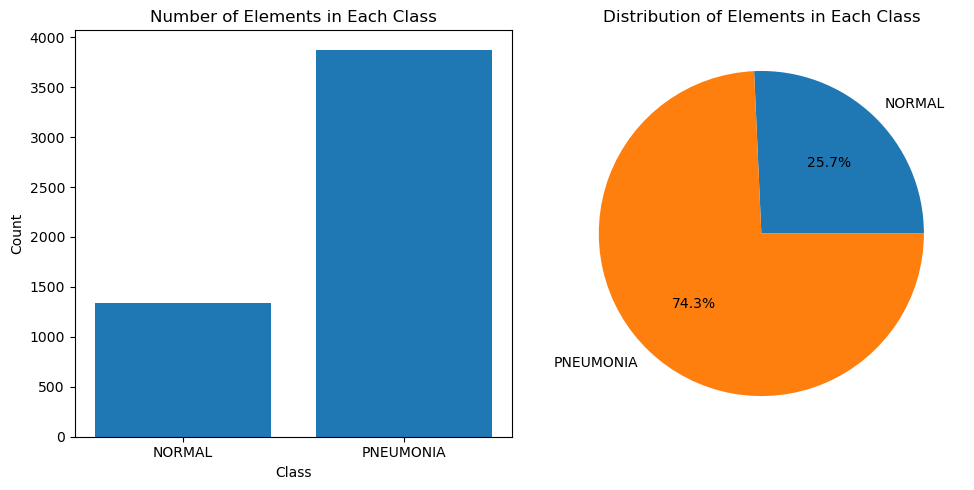

In [59]:
class_names = data_train.class_names
print("Label 0 Class:", class_names[0])
print("Label 1 Class:", class_names[1])

class_counts = {class_name: 0 for class_name in class_names}

for images, labels in data_train:
    for label in labels:
        class_name = class_names[label]
        class_counts[class_name] += 1

total_elements = sum(class_counts.values()) # total number of elements
class_percentages = {class_name: count/total_elements*100 for class_name, count in class_counts.items()} # percentage of elements in each class


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(class_counts.keys(), class_counts.values())
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')
ax1.set_title('Number of Elements in Each Class')
ax2.pie(class_percentages.values(), labels=class_percentages.keys(), autopct='%1.1f%%')
ax2.set_title('Distribution of Elements in Each Class')

fig.tight_layout()

plt.show()

In [60]:
#iterator as numpy array
train_iterator = data_train.as_numpy_iterator()
batch = train_iterator.next() #batch[1] save labels, batch[0] images

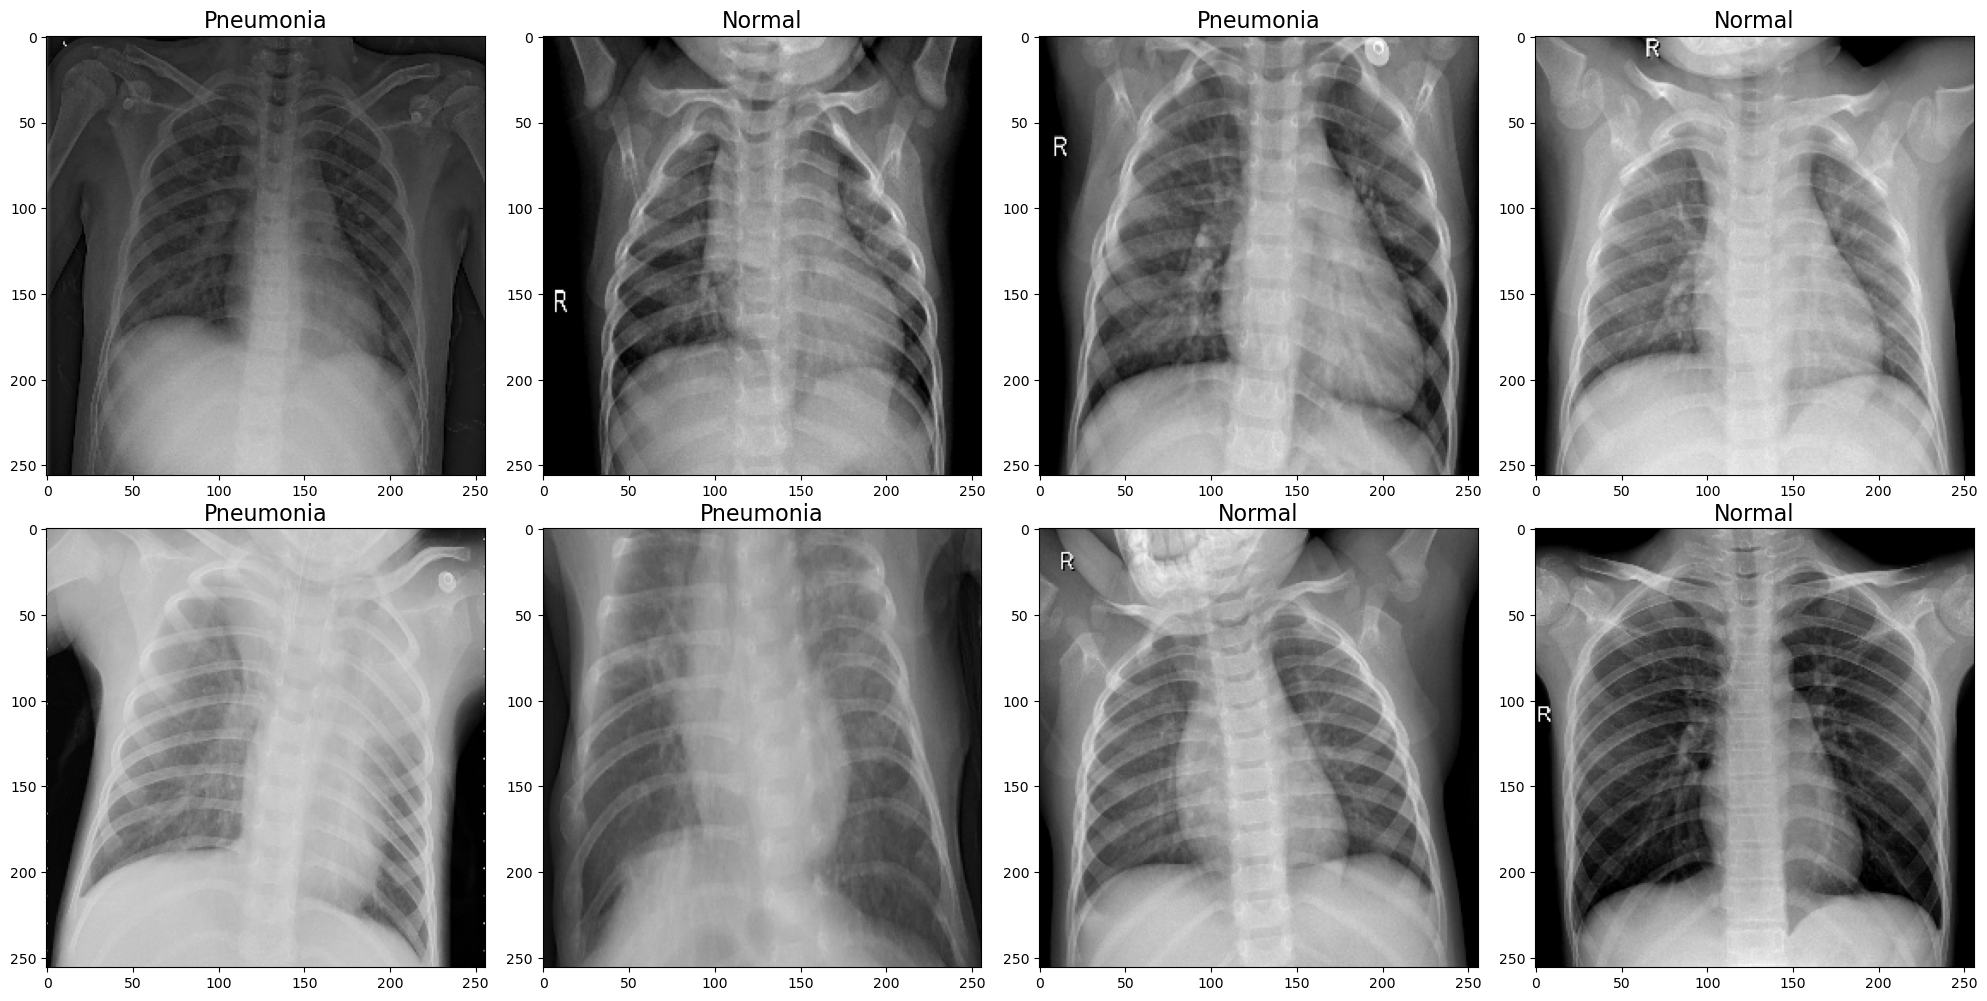

In [61]:
#Plot images
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for idx, img in enumerate(batch[0][0:8]):
    row = idx // 4
    col = idx % 4

    ax[row, col].imshow(img.astype(int))
    if batch[1][idx] == 0:
        ax[row, col].set_title("Normal", fontsize=16)
    elif batch[1][idx] == 1:
        ax[row, col].set_title("Pneumonia", fontsize=16)

plt.tight_layout()
plt.show()


<span style="color:darkblue"> Observations:  </span>  

+ The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5216 X-Ray images for train and 2 categories (Pneumonia/Normal).

+ The dataset exhibits a notable class imbalance, with pneumonia cases being nearly three times more prevalent than normal cases. To gain insights into the distinctions between normal and pneumonia cases, a sample analysis from the training data is conducted. Recognizing the need to address the class imbalance and enhance the training dataset, data augmentation techniques are employed. Data augmentation involves generating synthetic training examples by applying various transformations to the existing data, such as rotation, scaling, and flipping. This approach effectively increases the number of training instances and contributes to mitigating the effects of class imbalance. By incorporating data augmentation, we aim to improve the performance and robustness of the models in classifying pneumonia from X-ray images.

### Preprocess
Given the pre-existing division of the dataset, the images will be loaded into a Keras image dataset structure, segregated into the appropriate training, validation, and test sets. Subsequently, the pixel values of the images will be normalized to enhance the performance of the CNN model.

#### Split data

In [62]:
print('Found 5216 files belonging to 2 classes') #Train information
test = tf.keras.utils.image_dataset_from_directory(dir_test)
val = tf.keras.utils.image_dataset_from_directory(dir_val)

Found 5216 files belonging to 2 classes
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [63]:
batch[0].shape

(32, 256, 256, 3)

#### Scale data

In [64]:
#Sequentials useful
rescaling = tf.keras.Sequential([
        layers.Rescaling(1./255),
])

In [65]:
data_train = data_train.map(lambda x, y: (rescaling(x, training=True), y))
test = test.map(lambda x, y: (rescaling(x, training=True), y))
val = val.map(lambda x, y: (rescaling(x, training=True), y))

In [66]:
scaled_iterator = data_train.as_numpy_iterator()
batch = scaled_iterator.next()
print(f' Min train value: {batch[0].min()}, Max train value: { batch[0].max()}')

 Min train value: 0.0, Max train value: 1.0


# Deep models
## Model 1 (without data augmentation)

<p style="text-align: justify;"> This model represents a Convolutional Neural Network (CNN) architecture. The model starts by adding a series of convolutional layers with 16, 32, and 16 filters respectively, each using a 3x3 kernel and a ReLU activation function. These layers apply filters to the input image, extracting relevant features through feature maps. Max pooling layers are then employed to downsample the feature maps and reduce spatial dimensions. This helps in capturing the most important features while reducing the computational complexity. </p>

<p style="text-align: justify;"> Following the convolutional and max pooling layers, the model applies a flattening operation to convert the multidimensional output into a one-dimensional vector. This flattened representation is then fed into dense layers that serve as the classifier. The first dense layer consists of 256 neurons with a ReLU activation function, enabling the model to learn intricate relationships and patterns within the extracted features. Finally, a dense layer with a single neuron and a sigmoid activation function is added for binary classification, producing the probability of the input image belonging to the pneumonia class. </p>

<p style="text-align: justify;"> The model is compiled using the Adam optimizer and binary cross-entropy loss, which is well-suited for binary classification tasks. With this configuration, the model aims to learn the optimal parameters that minimize the loss function and maximize accuracy during training.  </p>

In [67]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3) ) )
model.add(MaxPooling2D()) 

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) 
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 30, 30, 16)      

### Train model 1

In [73]:
logdir = './logs/Pneumonia' # directory where the logs for TensorBoard will be saved.

In [74]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) # creates a TensorBoard used to enable the integration of TensorBoard with the training process

In [75]:
hist = model.fit(data_train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]) # starts the training process

Epoch 1/20
163/163 [==============================] - 173s 1s/step - loss: 0.1607 - accuracy: 0.9375 - val_loss: 0.6755 - val_accuracy: 0.6250
Epoch 2/20
163/163 [==============================] - 166s 979ms/step - loss: 0.0938 - accuracy: 0.9647 - val_loss: 0.4964 - val_accuracy: 0.7500
Epoch 3/20
163/163 [==============================] - 165s 988ms/step - loss: 0.0787 - accuracy: 0.9726 - val_loss: 0.3881 - val_accuracy: 0.6875
Epoch 4/20
163/163 [==============================] - 165s 994ms/step - loss: 0.0534 - accuracy: 0.9804 - val_loss: 0.5151 - val_accuracy: 0.7500
Epoch 5/20
163/163 [==============================] - 169s 1s/step - loss: 0.0423 - accuracy: 0.9839 - val_loss: 0.3150 - val_accuracy: 0.8125
Epoch 6/20
163/163 [==============================] - 166s 994ms/step - loss: 0.0337 - accuracy: 0.9868 - val_loss: 0.1114 - val_accuracy: 0.9375
Epoch 7/20
163/163 [==============================] - 166s 990ms/step - loss: 0.0264 - accuracy: 0.9906 - val_loss: 0.2575 - val_a

### Performance model 1

In [76]:
def plot_performance(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    ax1.plot(his.history['loss'], color='coral', label='Training Loss')
    ax1.plot(his.history['val_loss'], color='blue', label='Validation Loss')
    ax1.set_title('Loss')
    ax1.legend(loc='upper right')
    
    ax2.plot(his.history['accuracy'], color='coral', label='Training Accuracy')
    ax2.plot(his.history['val_accuracy'], color='blue', label='Validation Accuracy')
    ax2.set_title('Accuracy')
    ax2.legend(loc="lower right")
    
    plt.show()

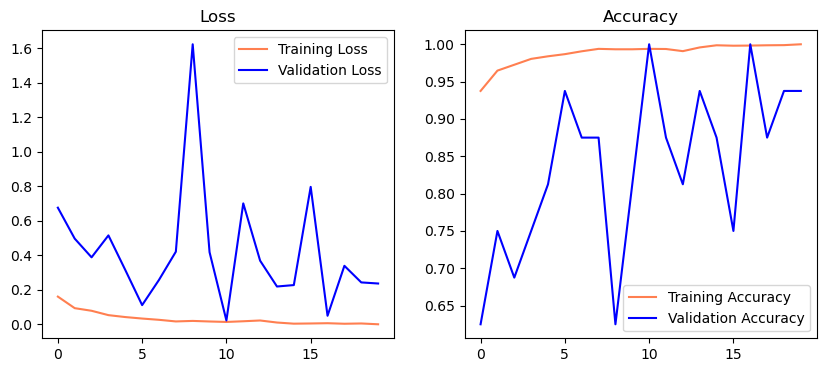

In [77]:
plot_performance(hist)

### Test model 1

In [78]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

def classification_results(Deepmodel, data_test):
    correctly_classified = []
    misclassified = []
    for batch in data_test.as_numpy_iterator(): 
        X, y = batch
        yhat = Deepmodel.predict(X)
        pre.update_state(y, yhat)
        re.update_state(y, yhat)
        acc.update_state(y, yhat)
        
        # Convert predicted probabilities to binary predictions
        yhat_binary = (yhat > 0.5).astype(int)
        # Compare predicted labels with true labels
        for i in range(len(y)):
            if yhat_binary[i] == y[i]:
                correctly_classified.append((X[i], y[i], yhat_binary[i]))
            else:
                misclassified.append((X[i], y[i], yhat_binary[i]))
    
    
    print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')
    
    print("Correctly Classified:")
    fig, ax = plt.subplots(2, 2, figsize=(6, 6))
    for i, sample in enumerate(correctly_classified[:4]):
        X, y, yhat = sample
        ax[i//2, i%2].imshow(X)
        ax[i//2, i%2].set_title(f"True Label: {y}, Predicted Label: {yhat}", fontsize=10)
        ax[i//2, i%2].axis('off')
    plt.tight_layout()
    plt.show()

    print("Misclassified:")
    fig, ax = plt.subplots(2, 2, figsize=(6, 6))
    for i, sample in enumerate(misclassified[:4]):
        X, y, yhat = sample
        ax[i//2, i%2].imshow(X)
        ax[i//2, i%2].set_title(f"True Label: {y}, Predicted Label: {yhat}", fontsize=10)
        ax[i//2, i%2].axis('off')
    plt.tight_layout()
    plt.show()



1/1 [==============================] - 0s 234ms/step
Precision: 0.7005444765090942, Recall: 0.9897435903549194, Accuracy: 0.7291666865348816
Correctly Classified:


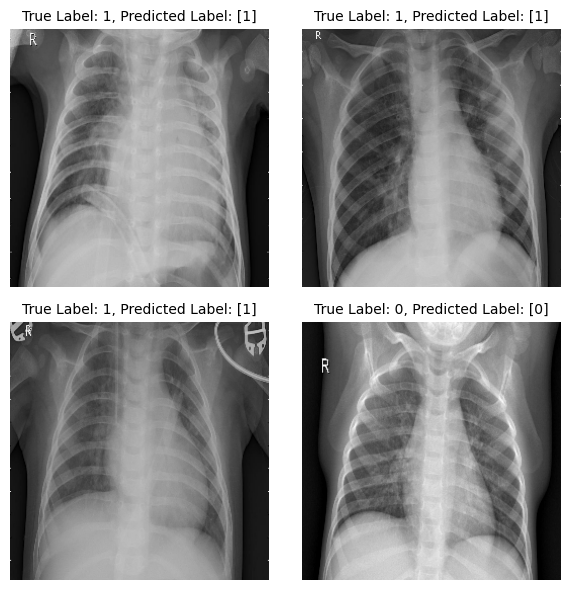

Misclassified:


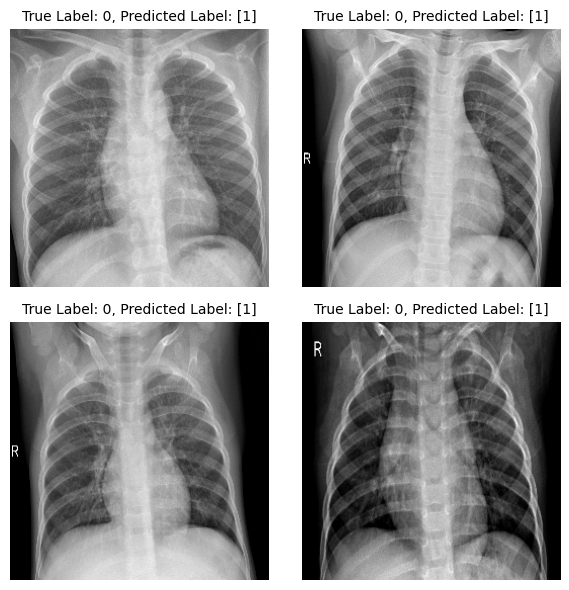

In [79]:
classification_results(model, test)

## Save model

In [ ]:
# Save model in native Keras format
def saveModel(deepModel, dir): 
    save_model(deepModel, dir)
    
saveModel(model, 'models/Pneumoniaclassifier')

In [ ]:
#Load model
#new_model = load_model('./models/Pneumoniaclassifier.h5')

## Model 1 (data augmentation)
#### Data augmentation

<p style="text-align: justify;"> Data augmentation is a technique commonly used in machine learning and computer vision to artificially increase the size and diversity of a training dataset. It involves applying various transformations or modifications to the existing data, such as rotations, translations, flips, zooms, and changes in brightness or contrast. The purpose of data augmentation is to introduce variations in the training data that mimic real-world scenarios and increase the model's ability to generalize and handle different input variations.  This helps to improve the model's performance, reduce overfitting, and enhance its ability to make accurate predictions on unseen data. </p>

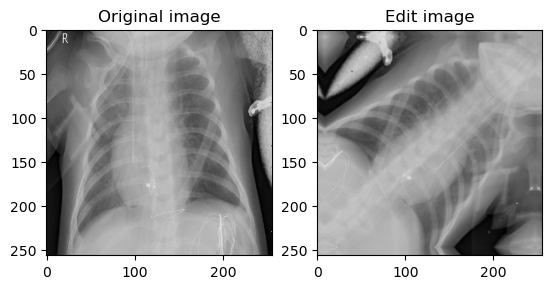

In [80]:
resize = tf.keras.Sequential([
    layers.Resizing(150, 150),
    layers.Rescaling(1./255),
])

datagen = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation((-0.2,0.2)),
    layers.RandomZoom(0.2),  # Add RandomZoom layer with zoom range of 0.2
])

img = batch[0][0]
result = datagen(img)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original image")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title("Edit image")
plt.show()

In [81]:
#Data split
data_original = tf.keras.utils.image_dataset_from_directory(dir_train)
test = tf.keras.utils.image_dataset_from_directory(dir_test)
val = tf.keras.utils.image_dataset_from_directory(dir_val)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [82]:
data_aug = data_original.map(lambda x, y: (datagen(x, training=True), y)) #  data augmentation

In [83]:
combined_data = tf.data.Dataset.concatenate(data_original, data_aug)

In [84]:
combined_data = combined_data.map(lambda x, y: (resize(x, training=True), y))
test = test.map(lambda x, y: (resize(x, training=True), y))
val = val.map(lambda x, y: (resize(x, training=True), y))

In [85]:
#combined_data = combined_data.shuffle(data_combinado.cardinality().numpy()) #Shuffle
scaled_iterator = combined_data.as_numpy_iterator()
batch = scaled_iterator.next()
print(f' original data size: {data_original.cardinality().numpy()}, augmentation data size: {data_aumentado.cardinality().numpy()}, combined data size: {combined_data.cardinality().numpy()} ')
print(f' Min value: {batch[0].min()}, Max value: { batch[0].max()}')

 original data size: 163, augmentation data size: 163, combined data size: 326 
 Min value: 0.0, Max value: 1.0


### Train model 1 (data augmentation)

In [88]:
model1 = Sequential()

model1.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(150,150,3) ) )
model1.add(MaxPooling2D()) 

model1.add(Conv2D(32, (3,3), 1, activation='relu'))
model1.add(MaxPooling2D())

model1.add(Conv2D(16, (3,3), 1, activation='relu'))
model1.add(MaxPooling2D())

model1.add(Flatten()) 
model1.add(Dense(256, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
logdir = './logs/PneumoniaModel1'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [89]:
#Same model, different data train
hist2 = model1.fit(combined_data, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
326/326 [==============================] - 220s 661ms/step - loss: 0.3285 - accuracy: 0.8617 - val_loss: 0.7481 - val_accuracy: 0.6250
Epoch 2/20
326/326 [==============================] - 218s 657ms/step - loss: 0.2189 - accuracy: 0.9071 - val_loss: 0.4735 - val_accuracy: 0.8750
Epoch 3/20
326/326 [==============================] - 210s 635ms/step - loss: 0.1717 - accuracy: 0.9285 - val_loss: 0.8702 - val_accuracy: 0.6250
Epoch 4/20
326/326 [==============================] - 217s 653ms/step - loss: 0.1452 - accuracy: 0.9444 - val_loss: 0.5467 - val_accuracy: 0.7500
Epoch 5/20
326/326 [==============================] - 209s 627ms/step - loss: 0.1272 - accuracy: 0.9505 - val_loss: 0.4080 - val_accuracy: 0.7500
Epoch 6/20
326/326 [==============================] - 205s 619ms/step - loss: 0.1215 - accuracy: 0.9525 - val_loss: 0.1997 - val_accuracy: 0.9375
Epoch 7/20
326/326 [==============================] - 195s 588ms/step - loss: 0.1085 - accuracy: 0.9589 - val_loss: 0.3145 -

### Performance model (data augmentation)

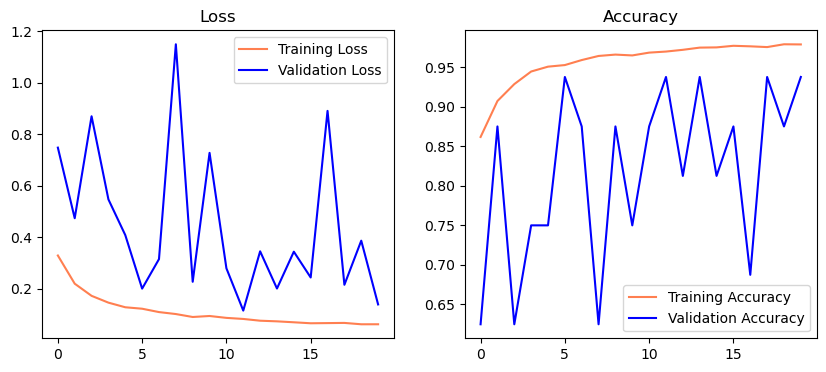

In [90]:
plot_performance(hist2)

1/1 [==============================] - 0s 305ms/step
Precision: 0.7394230961799622, Recall: 0.985897421836853, Accuracy: 0.7740384340286255
Correctly Classified:


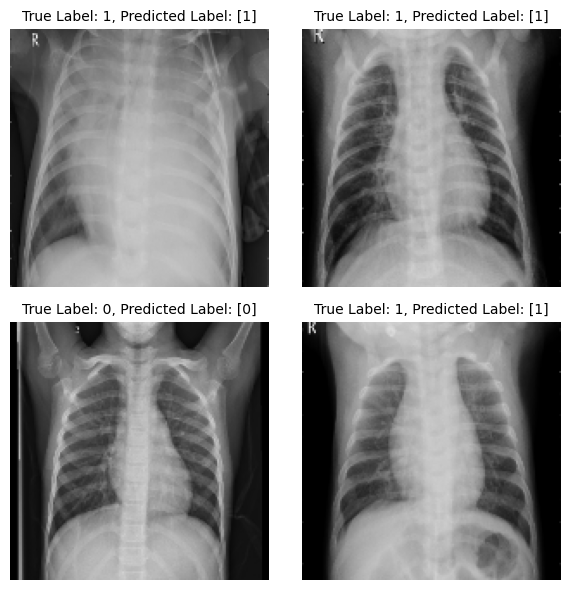

Misclassified:


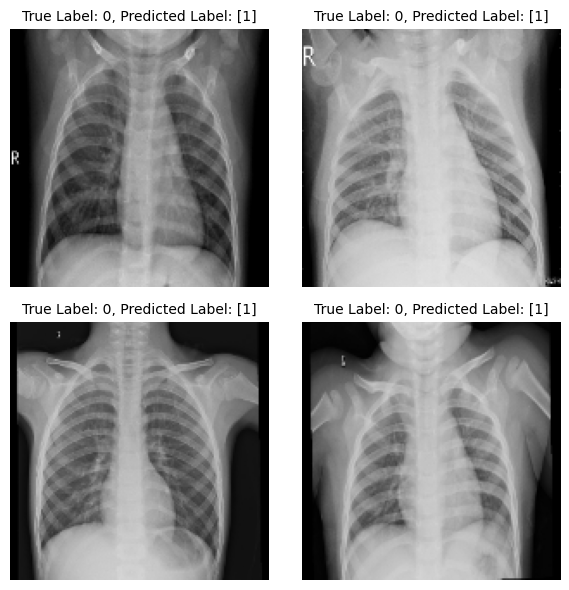

In [92]:
classification_results(model1, test)

<span style="color:darkblue"> Observations:  </span> 

<p style="text-align: justify;"> The performance of Model One was evaluated using two sets of data: one without augmentation and the other with augmentation. The metrics used to assess the model's performance include precision, recall, and accuracy are shown in the following table:  </p>

|              | Precision | Recall    | Accuracy   |
|--------------|-----------|-----------|------------|
| Without Augmentation | 0.70      | 0.99      | 0.73       |
| With Augmentation    | 0.74      | 0.99      | 0.77       |


<p style="text-align: justify;"> When examining the results, it can be observed that both sets of data yielded relatively high precision and recall values, indicating a good ability of the model to correctly classify pneumonia cases. However, when considering the accuracy metric, it becomes evident that the data with augmentation outperformed the data without augmentation. The accuracy score was noticeably higher when utilizing the augmented data, suggesting that the additional training examples generated through augmentation positively impacted the model's overall performance. By providing the model with a larger and more diverse dataset through augmentation, it becomes better equipped to capture relevant patterns and generalize to unseen data. Therefore, using augmented data appears to be a beneficial approach for improving the performance of the pneumonia classification model.  </p>


<p style="text-align: justify;"> Based on the results obtained, it is evident that data augmentation has a positive impact on the performance of the models. Therefore, data augmentation will be incorporated into the subsequent models to further improve their accuracy and robustness. </p>

# Modelo 2: 

<p style="text-align: justify;">  Model 2 is a more complex Convolutional Neural Network (CNN) architecture, designed to classify X-ray images into normal or pneumonia cases. The model starts by adding multiple convolutional layers with various filter sizes (32, 64, 64, 128, and 256) and a 3x3 kernel. Each convolutional layer applies filters to capture different levels of detail and extract relevant features from the input image. The use of the ReLU activation function ensures the non-linearity of the model, enabling it to learn complex patterns. </p>

<p style="text-align: justify;">  Batch normalization layers are inserted after some of the convolutional layers to improve the stability and performance of the model during training. These layers normalize the outputs of the previous layers, ensuring that the inputs to subsequent layers are well-scaled and reducing the likelihood of overfitting. Max pooling layers are then applied to downsample the feature maps, reducing the spatial dimensions and retaining the most salient features. </p>

<p style="text-align: justify;"> To prevent overfitting, dropout layers are introduced after certain convolutional layers. Dropout randomly deactivates a fraction of the neurons during each training iteration, which helps in reducing the interdependency among neurons and encourages the model to learn more robust and generalized features. </p>

<p style="text-align: justify;"> After the convolutional and pooling layers, a flattening operation is performed to convert the multidimensional output into a one-dimensional vector. This vector is then fed into dense layers, which act as the classifier. The dense layers consist of 128 and 1 neurons, respectively, with 'relu' and 'sigmoid' activation functions. The final dense layer outputs the probability of the input image belonging to the pneumonia class. The model is compiled using the RMSprop optimizer and binary cross-entropy loss, which are suitable for binary classification tasks. This configuration enables the model to optimize the parameters and minimize the loss during training, while evaluating the accuracy of the predictions. </p>

In [93]:
model2 = Sequential() 

model2.add(Conv2D(32, (3,3), strides=1, padding='same', activation='relu', input_shape=(150,150,3) ) )
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2,2)))

model2.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model2.add(Dropout(0.1))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2,2)))

model2.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2,2)))

model2.add(Conv2D(128, (3,3), strides=1, padding='same', activation='relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2,2)))

model2.add(Conv2D(256, (3,3), strides=1, padding='same', activation='relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2,2)))

model2.add(Flatten()) 
model2.add(Dense(units=128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy']) #prepares the model for training

In [94]:
model2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 batch_normalization_13 (Ba  (None, 150, 150, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 dropout_8 (Dropout)         (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_14 (Ba  (None, 75, 75, 64)      

### Train model 2

In [ ]:
logdir = './logs/PneumoniaModel2'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [96]:
hist3 = model2.fit(combined_data, epochs=15, validation_data=val, callbacks=[tensorboard_callback]) # starts the training process

Epoch 1/15
326/326 [==============================] - 458s 1s/step - loss: 0.3419 - accuracy: 0.8866 - val_loss: 62.4279 - val_accuracy: 0.5000
Epoch 2/15
326/326 [==============================] - 447s 1s/step - loss: 0.1950 - accuracy: 0.9338 - val_loss: 6.6211 - val_accuracy: 0.5000
Epoch 3/15
326/326 [==============================] - 441s 1s/step - loss: 0.1478 - accuracy: 0.9490 - val_loss: 2.0507 - val_accuracy: 0.5000
Epoch 4/15
326/326 [==============================] - 443s 1s/step - loss: 0.1358 - accuracy: 0.9582 - val_loss: 4.0702 - val_accuracy: 0.5000
Epoch 5/15
326/326 [==============================] - 441s 1s/step - loss: 0.1176 - accuracy: 0.9595 - val_loss: 15.2996 - val_accuracy: 0.5000
Epoch 6/15
326/326 [==============================] - 446s 1s/step - loss: 0.1073 - accuracy: 0.9654 - val_loss: 6.4354 - val_accuracy: 0.5000
Epoch 7/15
326/326 [==============================] - 442s 1s/step - loss: 0.1056 - accuracy: 0.9695 - val_loss: 0.3902 - val_accuracy: 0.93

### Performance model 2

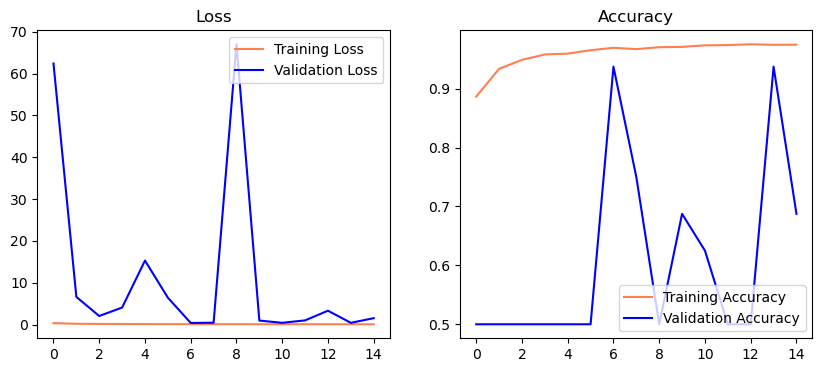

In [97]:
plot_performance(hist3)

1/1 [==============================] - 0s 328ms/step
Precision: 0.7273869514465332, Recall: 0.9897435903549194, Accuracy: 0.7617521286010742
Correctly Classified:


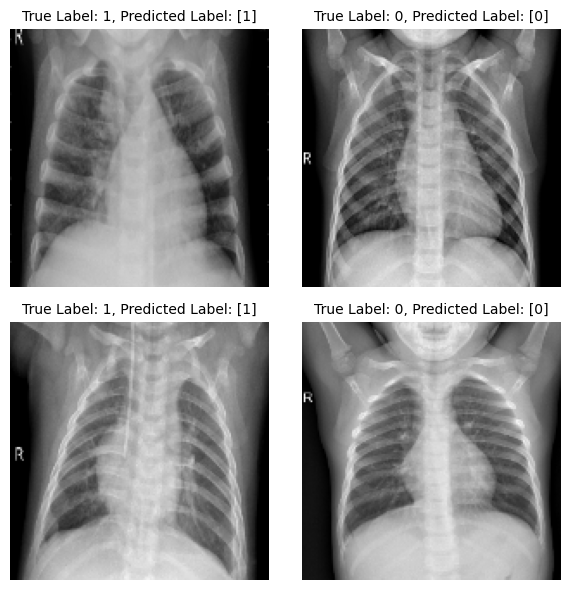

Misclassified:


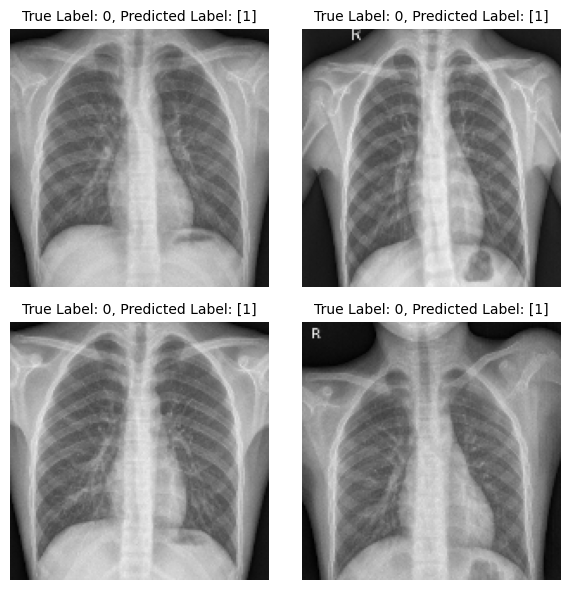

In [98]:
classification_results(model2, test)

# Model 3

<p style="text-align: justify;"> This model  represents a convolutional neural network (CNN) architecture which begins with a convolutional layer, followed by batch normalization and max pooling operations. The first convolutional layer applies 32 filters with a 3x3 kernel, using the 'relu' activation function to introduce non-linearity and capture important image features. Batch normalization normalizes the outputs of the previous layer, enhancing training stability and performance. Max pooling is then performed with a 2x2 window and a stride of 2, reducing the spatial dimensions while retaining the most significant features.  </p>

<p style="text-align: justify;"> Subsequent layers follow a similar pattern, with additional convolutional layers, dropout regularization, batch normalization, and max pooling. The convolutional layers progressively capture more complex patterns and features, with 64, 64, and 128 filters in each respective layer. Dropout regularization helps prevent overfitting by randomly deactivating neurons during training, reducing interdependencies and promoting generalization. Batch normalization ensures the inputs to subsequent layers are properly scaled.  </p>

<p style="text-align: justify;"> After the convolutional layers, a flattening operation is applied to transform the multidimensional output into a one-dimensional vector. This vector is then passed through dense layers, consisting of 128 neurons with 'relu' activation. Dropout regularization is again applied to further prevent overfitting. The final dense layer contains a single neuron with a 'sigmoid' activation function, producing the probability of the input image belonging to the pneumonia class.  </p>

<p style="text-align: justify;"> The model is compiled using the RMSprop optimizer and binary cross-entropy loss, suitable for binary classification tasks. The optimizer adjusts the model's parameters to minimize the loss during training, while the accuracy metric is used to evaluate its performance.  </p>

<p style="text-align: justify;"> Furthermore, as part of the preprocessing step for this model, the data will be transformed from RGB format to grayscale. This conversion to grayscale will help simplify the input data by reducing it to a single channel, while still preserving important visual features for pneumonia classification. </p>

In [99]:
data_original = tf.keras.utils.image_dataset_from_directory(dir_train)
data_aumentado = data_original.map(lambda x, y: (datagen(x, training=True), y))
data_combinado = tf.data.Dataset.concatenate(data_original, data_aumentado)
data_combinado = data_combinado.map(lambda x, y: (resize(x, training=True), y))

resize = tf.keras.Sequential([
     layers.Resizing(150, 150), 
])


# Convert RGB images to grayscale
data_combinado = data_combinado.map(lambda x, y: (tf.image.rgb_to_grayscale(x), y))
data_combinado = data_combinado.map(lambda x, y: (resize(x, training=True), y))

val = tf.keras.utils.image_dataset_from_directory(dir_val)
val = val.map(lambda x, y: (tf.image.rgb_to_grayscale(x), y))
val = val.map(lambda x, y: (resize(x, training=True), y))

test = tf.keras.utils.image_dataset_from_directory(dir_test)
test = test.map(lambda x, y: (tf.image.rgb_to_grayscale(x), y))
test = test.map(lambda x, y: (resize(x, training=True), y))

scaled_iterator = data_combinado.as_numpy_iterator()
batch = scaled_iterator.next()
print(f' Min value: {batch[0].min()}, Max value: { batch[0].max()}')

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
 Min value: 0.0, Max value: 0.9999000430107117


In [100]:
model3 = Sequential()
model3.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model3.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(Dropout(0.1))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model3.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model3.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model3.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model3.add(Flatten())
model3.add(Dense(units = 128 , activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units = 1 , activation = 'sigmoid'))
model3.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model3.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 150, 150, 32)      320       
                                                                 
 batch_normalization_18 (Ba  (None, 150, 150, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 dropout_12 (Dropout)        (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_19 (Ba  (None, 75, 75, 64)      

### Train model 3

In [ ]:
logdir = './logs/PneumoniaModel3'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [101]:
hist4 = model3.fit(data_combinado, epochs=15, validation_data=val, callbacks=[tensorboard_callback]) # starts the training process

Epoch 1/15
326/326 [==============================] - 458s 1s/step - loss: 0.4094 - accuracy: 0.8824 - val_loss: 13.0923 - val_accuracy: 0.7500
Epoch 2/15
326/326 [==============================] - 479s 1s/step - loss: 0.1734 - accuracy: 0.9393 - val_loss: 459.7485 - val_accuracy: 0.5000
Epoch 3/15
326/326 [==============================] - 476s 1s/step - loss: 0.1458 - accuracy: 0.9517 - val_loss: 1116.5146 - val_accuracy: 0.5000
Epoch 4/15
326/326 [==============================] - 478s 1s/step - loss: 0.1310 - accuracy: 0.9572 - val_loss: 391.7958 - val_accuracy: 0.6250
Epoch 5/15
326/326 [==============================] - 484s 1s/step - loss: 0.1079 - accuracy: 0.9629 - val_loss: 953.1790 - val_accuracy: 0.6250
Epoch 6/15
326/326 [==============================] - 465s 1s/step - loss: 0.0977 - accuracy: 0.9686 - val_loss: 1008.7952 - val_accuracy: 0.6250
Epoch 7/15
326/326 [==============================] - 467s 1s/step - loss: 0.0968 - accuracy: 0.9680 - val_loss: 63.9601 - val_ac

### Performance model 3

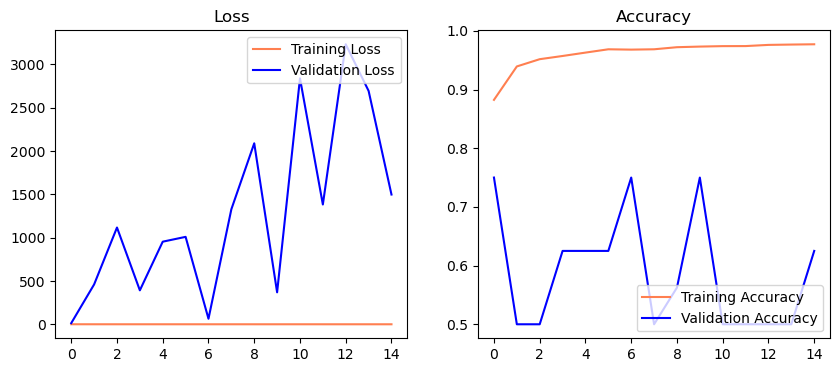

In [102]:
plot_performance(hist4)

1/1 [==============================] - 1s 1s/step
Precision: 0.7222482562065125, Recall: 0.9884615540504456, Accuracy: 0.7552083134651184
Correctly Classified:


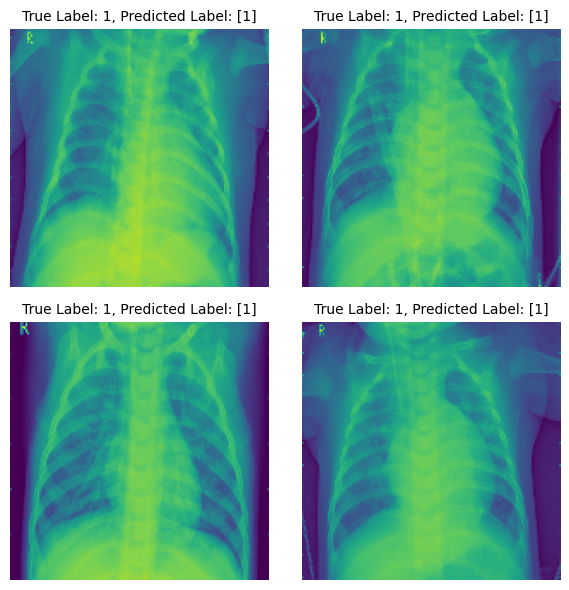

Misclassified:


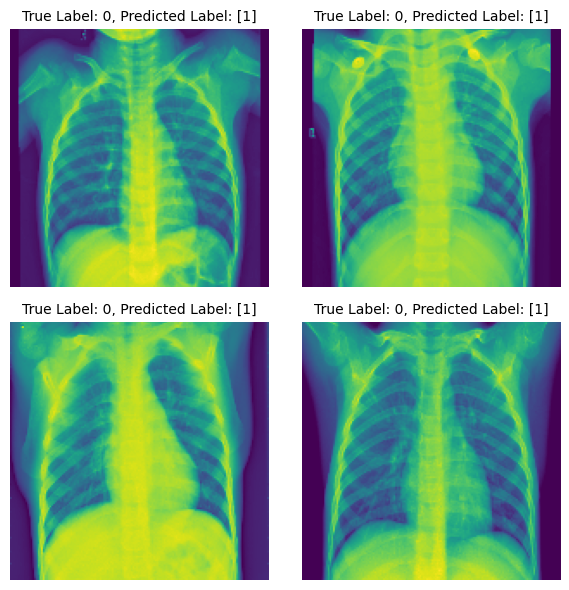

In [103]:
classification_results(model3, test)

# <span style="color: black"> Analysis  </span> 

<p style="text-align: justify;"> The following table presents the evaluation metrics for three different models (Model 1, Model 2, and Model 3) trained for pneumonia classification. The metrics include Precision, Recall, and Accuracy, which measure the performance of the models in terms of classification accuracy and the ability to correctly identify pneumonia cases. The values in the table have been rounded to two significant digits for better readability. </p>

|CNN Model   | Precision |  Recall  | Accuracy |
|:---------:|:---------:|:-------:|:-------:|
|  Model 1  |    0.74   |   0.99  |   0.77  |
|  Model 2  |    0.73   |   0.99  |   0.76  |
|  Model 3  |    0.72   |   0.99  |   0.76  |

<p style="text-align: justify;"> The performance of each model can be assessed by examining the evaluation metrics presented in the table. Model 1 achieved a Precision of 0.74, indicating a relatively high level of accuracy in identifying positive cases. Additionally, it achieved a Recall of 0.99, implying that it effectively captured a significant number of positive instances from the dataset. The overall accuracy of Model 1 stood at 0.77, suggesting its commendable performance in accurately classifying pneumonia cases. On the other hand, Model 2 displayed a Precision of 0.73, indicating a slightly lower precision compared to Model 1. However, with a Recall of 0.99, it performed similarly in capturing positive cases. The accuracy achieved by Model 2 was 0.76, which was slightly lower than that of Model 1. Although there is a slight difference in performance between the two models, it remains relatively small. Model 3 has a slightly lower precision and accuracy. However, its recall value is similar to that of the other models, indicating that it can effectively identify positive cases of pneumonia. </p>

<p style="text-align: justify;"> The following plot provides a comparison of the accuracy and loss values for three different models (Model 1, Model 2, and Model 3) used in the classification of pneumonia. The plot showcases the training progress of each model over multiple epochs. The accuracy values indicate the model's ability to correctly classify the images, while the loss values represent the model's optimization during the training process. </p>


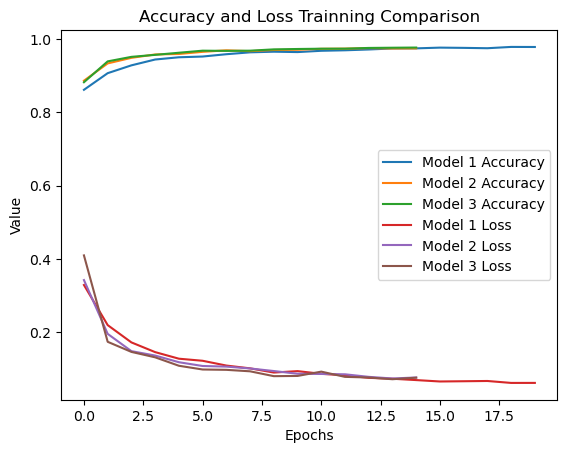

In [110]:
accuracy_model1 = hist2.history['accuracy']
loss_model1 = hist2.history['loss']

accuracy_model2 = hist3.history['accuracy']
loss_model2 = hist3.history['loss']

accuracy_model3 = hist4.history['accuracy']
loss_model3 = hist4.history['loss']

# Plot the accuracy values
plt.plot(accuracy_model1, label='Model 1 Accuracy')
plt.plot(accuracy_model2, label='Model 2 Accuracy')
plt.plot(accuracy_model3, label='Model 3 Accuracy')

# Plot the loss values
plt.plot(loss_model1, label='Model 1 Loss')
plt.plot(loss_model2, label='Model 2 Loss')
plt.plot(loss_model3, label='Model 3 Loss')

# Set the plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Accuracy and Loss Trainning Comparison')
plt.legend()

# Show the plot
plt.show()


<p style="text-align: justify;">  The accuracy and loss plots of each model exhibit the expected behavior during training. The accuracy curves of the models show an increasing trend with each epoch, indicating that they are learning and improving their performance on the training data. However, when examining the accuracy and loss curves on the validation data, a more variable pattern can be observed, with fluctuations and peaks that do not closely follow the training data curves.  </p>

<p style="text-align: justify;">  This behavior can be attributed to several factors. One factor is the complexity of the dataset and the model's ability to generalize to unseen data. Additionally, the limited amount of validation data may contribute to the variability in the curves. Another factor to consider is the possibility of overfitting, where the model may overly adapt to the specific details of the training data and struggle to effectively generalize to new data.  </p>

<p style="text-align: justify;">  To address this issue, techniques such as regularization can be applied to prevent overfitting, and increasing the amount of validation data can provide a more reliable estimate of the model's performance on unseen data. Additionally, adjusting the model's hyperparameters, such as learning rate or network structure, can also help improve generalization.  </p>

<p style="text-align: justify;">  In terms of the analysis of the plots, it can be observed that model 1 exhibits the best behavior in terms of the accuracy and loss curves. Its curves are smoother and closely aligned with the training data curves, indicating better generalization capability and lower risk of overfitting.  </p>

# <span style="color: black"> Conclusions </span> 
<p style="text-align: justify;"> In conclusion, this project aimed to explore the classification of pneumonia using X-ray images and investigate the impact of data augmentation on model performance. Three different CNN models were developed and evaluated. The results showed that data augmentation significantly improved the performance of the models, as evidenced by higher precision, recall, and accuracy metrics compared to models trained without augmentation. This highlights the importance of data augmentation in addressing the challenges of imbalanced datasets and improving the robustness of the models. </p>

<p style="text-align: justify;"> Furthermore, the analysis of the models' architecture revealed that Model 1, which consisted of multiple convolutional and pooling layers followed by dense layers, demonstrated the best performance in terms of accuracy and loss curves and metris such as precision, recall and accuracy. This suggests that the chosen architecture and configuration of Model 1 were effective in capturing relevant features and generalizing well to unseen data. In addition, it is worth noting that Model 1, compared to the other models, has a relatively simpler architecture. This simplicity not only contributes to its superior performance but also results in shorter computational time during training and inference. This makes Model 1 a more efficient and practical choice in scenarios where computational resources or time constraints are a consideration. </p>

<p style="text-align: justify;"> Furthermore, it is important to acknowledge that the success of the models in classifying pneumonia from X-ray images is a significant step towards aiding medical professionals in diagnosing and treating this condition. However, it is essential to exercise caution in relying solely on automated models for diagnosis, as they should be used as supportive tools rather than replacements for clinical expertise. The integration of these models into the existing healthcare system should be approached with careful consideration, ensuring proper validation, interpretability, and collaboration with medical professionals to ensure patient safety and effective decision-making. </p>
